In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(128,128),batch_size=32,class_mode="categorical")

Found 3476 images belonging to 4 classes.


In [13]:
x_train.class_indices

{'dandelion': 0, 'rose': 1, 'sunflower': 2, 'tulip': 3}

In [14]:
from keras.models import Sequential

model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [32]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,steps_per_epoch=1000,epochs=20,validation_data=x_train)

Epoch 1/20


InvalidArgumentError: ignored

In [18]:
model.save("flower.h5")

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

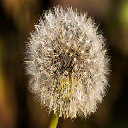

In [21]:
model = load_model("/content/flower.h5")
img = image.load_img(r"/content/drive/MyDrive/flowers/dandelion/10486992895_20b344ce2d_n.jpg",target_size=(128,128))
img

In [ ]:
type(img)

PIL.Image.Image

In [22]:
x = image.img_to_array(img)
x

array([[[ 37.,  21.,   8.],
        [ 47.,  28.,  13.],
        [ 65.,  41.,  13.],
        ...,
        [ 89.,  84.,  29.],
        [ 95.,  88.,  33.],
        [ 99.,  93.,  35.]],

       [[ 32.,  15.,   5.],
        [ 42.,  24.,  10.],
        [ 58.,  36.,  12.],
        ...,
        [ 93.,  88.,  32.],
        [101.,  95.,  35.],
        [106., 100.,  38.]],

       [[ 27.,  14.,   5.],
        [ 38.,  22.,   9.],
        [ 53.,  32.,  11.],
        ...,
        [ 98.,  94.,  33.],
        [106., 101.,  35.],
        [111., 106.,  38.]],

       ...,

       [[ 89.,  54.,  24.],
        [ 90.,  55.,  25.],
        [ 89.,  54.,  24.],
        ...,
        [ 23.,  22.,   4.],
        [ 21.,  22.,   4.],
        [ 20.,  21.,   3.]],

       [[ 85.,  54.,  23.],
        [ 86.,  55.,  24.],
        [ 85.,  54.,  23.],
        ...,
        [ 22.,  23.,   5.],
        [ 23.,  22.,   4.],
        [ 25.,  24.,   6.]],

       [[ 82.,  53.,  23.],
        [ 83.,  54.,  24.],
        [ 83.,  

In [23]:
x.shape

(128, 128, 3)

In [24]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [25]:
pred_prob = model.predict(x)
pred_prob

array([[2.3037127e-23, 1.0000000e+00, 6.2480730e-27, 0.0000000e+00,
        1.4578701e-14]], dtype=float32)

In [26]:
class_name = ["daisy","dandelion","rose","sunfower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]
pred_id

1

# ***Test the Model***

In [27]:
print("Predicted flower is",str(class_name[pred_id]))

Predicted flower is dandelion
